In [2]:
from bagpy import bagreader
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os

%matplotlib widget

## Load Data

bagpy is used to load bag files. 
A list of bagreaders is made. One bagreader for each trial. So if an experiment was performed 4 times, a list of 4 bagreaders will be made.

In [126]:
# directory = '/home/jin/work/MT/predictive-exoskeleton/workspace/src/plotter/experiment/launch/bag/Jin24_03/' # home
directory = '/home/ics-student/students/jinho/MA/repo/predictive-exoskeleton/workspace/src/plotter/experiment/launch/bag/test' # uni
b = []
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if not os.path.isdir(f):
        b.append(bagreader(f))

[INFO]  Data folder /home/ics-student/students/jinho/MA/repo/predictive-exoskeleton/workspace/src/plotter/experiment/launch/bag/test/test2 already exists. Not creating.
[INFO]  Data folder /home/ics-student/students/jinho/MA/repo/predictive-exoskeleton/workspace/src/plotter/experiment/launch/bag/test/test already exists. Not creating.
[INFO]  Successfully created the data folder /home/ics-student/students/jinho/MA/repo/predictive-exoskeleton/workspace/src/plotter/experiment/launch/bag/test/test4.


### List of available topics 

In [47]:
# Get topics in bag
b[0].topic_table

,Topics,Types,Message Count,Frequency
0,exp_data,sync_msgs/ExperimentData,1,NaN
1,q,sync_msgs/CustomData,4215,200.00084
2,state,sync_msgs/SyncQ,4215,200.00084
3,traj,sync_msgs/CustomData,4215,200.00084


### Create csv files of given topics
Topics of all bagfiles saved in a list in corresponding order

In [127]:
# Make csv of given topics
meta_data_list = []
state_msg_list = []
response_msg_list = []
ref_msg_list = []
for bag in b:
    if len(os.listdir(bag.datafolder)) == 0:
        meta_data_list.append(bag.message_by_topic('exp_data'))
        state_msg_list.append(bag.message_by_topic('state'))
        # response_msg_list.append(bag.message_by_topic('response'))
        ref_msg_list.append(bag.message_by_topic('traj'))
    else:
        print("CSV files already exist for: ", bag.datafolder)
        for csv in os.listdir(bag.datafolder):
            file = os.path.splitext(csv)[0]
            # print(csv, ":")
            if 'exp_data'.find(file) != -1:
                meta_data_list.append(os.path.join(bag.datafolder, csv))
                # print("Appending ", csv, " to meta_data_list")
            elif 'state'.find(file) != -1:
                state_msg_list.append(os.path.join(bag.datafolder, csv))
                # print("Appending ", csv, " to state_msg_list")
            elif 'response'.find(file) != -1:
                response_msg_list.append(os.path.join(bag.datafolder, csv))
                # print("Appending ", csv, " to response_msg_list")
            elif 'traj'.find(file) != -1:
                ref_msg_list.append(os.path.join(bag.datafolder, csv))
                # print("Appending ", csv, " to ref_msg_list")

CSV files already exist for:  /home/ics-student/students/jinho/MA/repo/predictive-exoskeleton/workspace/src/plotter/experiment/launch/bag/test/test2
CSV files already exist for:  /home/ics-student/students/jinho/MA/repo/predictive-exoskeleton/workspace/src/plotter/experiment/launch/bag/test/test


### Create pandas data frames from csv files

Function to convert csv to data frame:

In [32]:
def csv2df(csv_list):
    df_list = []
    for csv in csv_list:
            df_list.append(pd.read_csv(csv))
    return df_list

In [128]:
# Turn csv into dataframes
meta_df_list = csv2df(meta_data_list)
state_df_list = csv2df(state_msg_list)
# response_df_list = csv2df(response_msg_list)
ref_df_list = csv2df(ref_msg_list)

In [10]:
# Only for now rising time is not being recorded correctly
for df in response_df_list:
    df['rise_t'] = df['rise_t'] - 10

NameError: name 'response_df_list' is not defined

#### General information on collected data

In [95]:
# Experiment Information
meta_df_list[0]

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,mode,mass_0,mass_1,mass_2,trials_0,trials_1,trials_2,trial_length
0,90.435877,0,90,435877332,NaN,TRIAL,1.0,2.0,0.0,6.0,7.0,7.0,20.0


In [94]:
# Response Analysis Data
response_df_list[0]

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,overshoot,rise_t,settle_t,ringing
0,110.442461,0,110,442461052,NaN,1.094325,1.464996,0.0,0.0
1,130.447462,1,130,447462378,NaN,0.000000,1.710002,0.0,0.0
2,150.462458,2,150,462457917,NaN,0.457201,2.284990,0.0,0.0
3,170.462470,3,170,462470132,NaN,2.102778,1.890000,0.0,0.0
4,190.467460,4,190,467459871,NaN,0.606985,1.710009,0.0,0.0
5,210.472460,5,210,472460088,NaN,1.100034,1.570005,0.0,0.0
6,230.482458,6,230,482458337,NaN,1.271621,1.879999,0.0,0.0
7,250.487458,7,250,487458470,NaN,0.000000,1.705008,0.0,0.0
8,270.497458,8,270,497458001,NaN,0.119185,2.049997,0.0,0.0
9,290.507457,9,290,507457350,NaN,0.516967,1.840001,0.0,0.0


In [93]:
ref_df_list[0]

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,value.data
0,91.452404,18087,91,452404017,NaN,30.0
1,91.457458,18088,91,457457639,NaN,30.0
2,91.462457,18089,91,462457249,NaN,30.0
3,91.467458,18090,91,467457930,NaN,30.0
4,91.472459,18091,91,472459013,NaN,30.0
...,...,...,...,...,...,...
80195,492.427461,98282,492,427461103,NaN,30.0
80196,492.432419,98283,492,432418936,NaN,30.0
80197,492.437457,98284,492,437456681,NaN,30.0
80198,492.442456,98285,492,442455982,NaN,30.0


In [92]:
state_df_list[0]

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,state.q_state.q,state.q_state.qd,state.q_state.qdd,state.tau,state.force_up,state.force_down,high
0,90.452404,18087,90,452404017,NaN,29.734741,-3.919595,31.692699,0.0,0.0,0.0,False
1,90.457458,18088,90,457457639,NaN,29.663674,-3.344969,27.046445,0.0,0.0,0.0,False
2,90.462457,18089,90,462457249,NaN,29.647200,-3.294816,10.030644,0.0,0.0,0.0,False
3,90.467458,18090,90,467457930,NaN,29.630973,-3.245415,9.880249,0.0,0.0,0.0,False
4,90.472459,18091,90,472459013,NaN,29.614989,-3.196754,9.732108,0.0,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
80184,491.427461,98282,491,427461103,NaN,30.149229,-0.200803,1.623638,0.0,0.0,0.0,False
80185,491.432419,98283,491,432418936,NaN,30.148264,-0.193001,1.560548,0.0,0.0,0.0,False
80186,491.437457,98284,491,437456681,NaN,30.147336,-0.185501,1.499909,0.0,0.0,0.0,False
80187,491.442456,98285,491,442455982,NaN,30.146445,-0.178293,1.441626,0.0,0.0,0.0,False


## Plot Data

### Plot State Information

#### Helper Functions for plotting state information

In [209]:
def draw_mass_background(start_time, Mass_Order, Mass_Trial, Trial_Length, Delay, axis, min, max):
    """
    state_Df: experiment start time
    Mass_Order: float/int list of mass (in order)
    Mass_Trial: int list with number of trials per mass. Must have same length as Mass_Order
    Trial_Length: float/int of length of trial
    Delay: int (for now) of delay between state and reference.
    axis: matplotlib axis to plot on
    min: min value of plot
    max: max value of plot
    """
    i = 0
    trial_start = 0
    trial_end = 0
    for mass in Mass_Order:
        if i == 0:
            trial_end = start_time + Mass_Trial[i]*Trial_Length + Delay
        else:
            trial_end = trial_start + Mass_Trial[i]*Trial_Length
        
        if mass == 0.0:
            axis.fill_between((trial_start, trial_end), min, max, alpha=0.2, color='green')
        elif mass == 1.0:
            axis.fill_between((trial_start, trial_end), min, max, alpha=0.2, color='yellow')
        elif mass == 2.0:
            axis.fill_between((trial_start, trial_end), min, max, alpha=0.2, color='red')
        trial_start = trial_end
        i = i + 1


In [210]:
def generic_plot(variable, axis, background, state_dataframe, ref_dataframe, meta_dataframe):
    variable = 'state.' + variable
    axis.plot('Time', variable, data= state_dataframe, color = 'red', linewidth = 1.0)
    if background:
        mass_order = [meta_dataframe['mass_0'].iloc[0], meta_dataframe['mass_1'].iloc[0], meta_dataframe['mass_2'].iloc[0]]
        mass_trial = [meta_dataframe['trials_0'].iloc[0], meta_dataframe['trials_1'].iloc[0], meta_dataframe['trials_2'].iloc[0]]
        trial_length = meta_dataframe['trial_length'].iloc[0]
        delay = 1.0 # TODO: include delay into meta dataframe
        draw_mass_background(state_dataframe['Time'].iloc[0], mass_order, mass_trial, trial_length, delay, axis, state_dataframe[variable].min(), state_dataframe[variable].max())
    axis.set_xlim((state_dataframe['Time'].iloc[0], ref_dataframe['Time'].iloc[-1]))
    axis.set_ylim((state_dataframe[variable].min(), state_dataframe[variable].max()))

def plot_q(axis, background, reference, state_dataframe, ref_dataframe, meta_dataframe):
    if reference:
        axis.plot('Time', 'value.data', data=ref_dataframe, color='black', linewidth=1.0)
        axis.set_title('q vs reference')
    else:
        axis.set_title('q')
    generic_plot('q_state.q', axis, background, state_dataframe, ref_dataframe, meta_dataframe)
    axis.set_ylabel('Angle (deg)')
    axis.grid()

def plot_qd(axis, background, reference, state_dataframe, ref_dataframe, meta_dataframe):
    if reference:
        axis.plot(ref_dataframe['Time'], ref_dataframe['value.data']-55, color='k', linewidth = 0.8)
        axis.set_title('qd & reference')
    else:
        axis.set_title('qd')
    generic_plot('q_state.qd', axis, background, state_dataframe, ref_dataframe, meta_dataframe)
    axis.set_ylabel('Velocity (deg/s)')
    axis.grid()

def plot_qdd(axis, background, reference, state_dataframe, ref_dataframe, meta_dataframe):
    if reference:
        axis.plot(ref_dataframe['Time'], (ref_dataframe['value.data']-55)*3, color='k', linewidth = 0.8)
        axis.set_title('qdd & reference')
    else:
        axis.set_title('qdd')
    generic_plot('q_state.qdd', axis, background, state_dataframe, ref_dataframe, meta_dataframe)
    axis.set_ylabel('Accel (deg/s^2)')
    axis.grid()

def plot_tau(axis, background, reference, state_dataframe, ref_dataframe, meta_dataframe):
    if reference:
        axis.plot(ref_dataframe['Time'], (ref_dataframe['value.data']-55)/100, color='k', linewidth = 0.8)
        axis.set_title('Tau & Reference')
    else:
        axis.set_title('Tau')
    generic_plot('tau', axis, background, state_dataframe, ref_dataframe, meta_dataframe)
    axis.set_ylabel('Torque ')
    axis.grid()

def plot_state(plot_list, background, reference, state_dataframe, ref_dataframe, meta_dataframe):
    """
    plot_list: string list of data to plot. q, qd, qdd and tau are possible
    background: boolean whether background should be colored based on mass
    reference: boolean whether to plot reference trajectory
    """
    fig, axs = plt.subplots(len(plot_list))
    i = 0
    for plot in plot_list:
        if plot == 'q':
            plot_q(axs[i], background, reference, state_dataframe, ref_dataframe, meta_dataframe)
        elif plot == 'qd':
            plot_qd(axs[i], background, reference, state_dataframe, ref_dataframe, meta_dataframe)
        elif plot == 'qdd':
            plot_qdd(axs[i], background, reference, state_dataframe, ref_dataframe, meta_dataframe)
        elif plot == 'tau':
            plot_tau(axs[i], background, reference, state_dataframe, ref_dataframe, meta_dataframe)
        i = i + 1
    return fig, axs

#### Plot Specified State for 1 trial

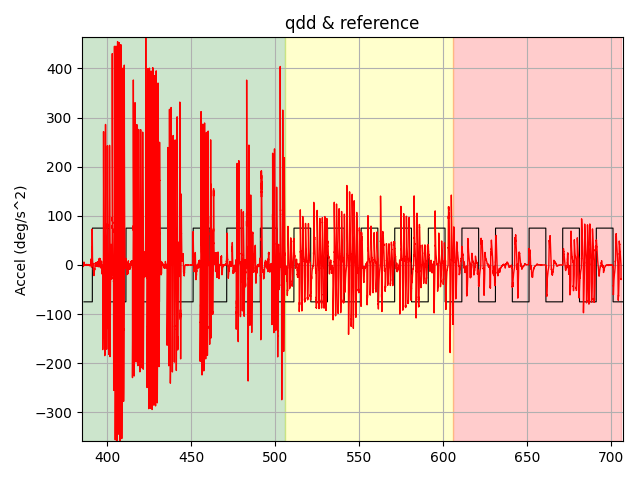

In [211]:
fig, ax = plt.subplots()
plot_qdd(ax, True, True, state_df_list[0], ref_df_list[0], meta_df_list[0])
plt.tight_layout()

#### Plot specified state for all trials

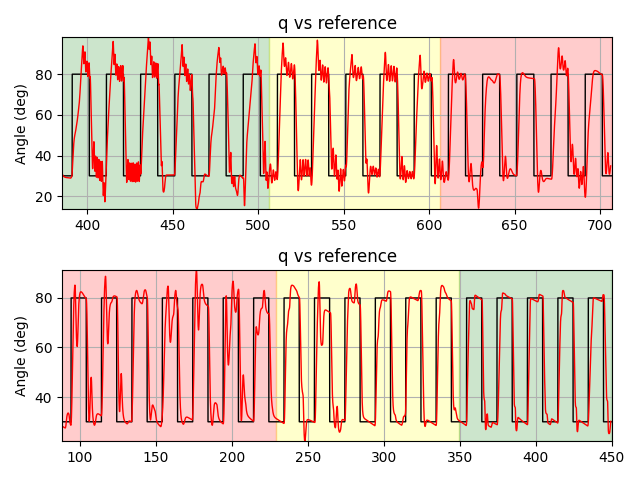

In [212]:
fig, axes = plt.subplots(len(state_df_list))
i = 0
for trial in state_df_list:
    plot_q(axes[i], True, True, trial, ref_df_list[i], meta_df_list[i])
    i = i + 1

plt.tight_layout()

#### Plot all States for 1 trial

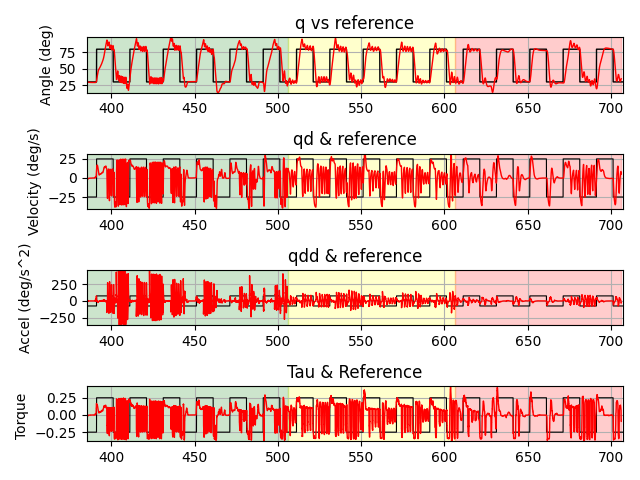

In [214]:
fig, axes = plot_state(['q', 'qd', 'qdd', 'tau'], True, True, state_df_list[0], ref_df_list[0], meta_df_list[0])
plt.tight_layout()

#### Plot state for all trials

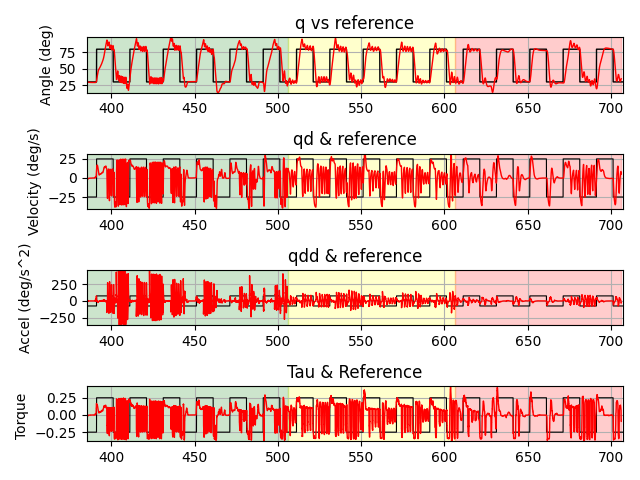

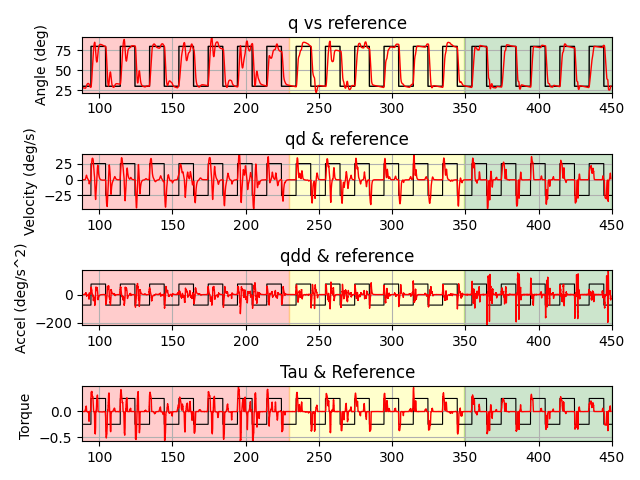

In [216]:
fig_list = []
axis_list = []
i = 0
for trial in state_df_list:
    fig, axes = plot_state(['q', 'qd', 'qdd', 'tau'], True, True, trial, ref_df_list[i], meta_df_list[i])
    fig_list.append(fig)
    axis_list.append(axes)
    i = i + 1
    plt.tight_layout()

### Plot Response Information

#### Helper Functions

In [217]:
def generic_response(response, axis, meta_dataframe, response_dataframe):
    axis.grid()
    axis.set_axisbelow(True)

    mass_order = [meta_dataframe['mass_0'].iloc[0], meta_dataframe['mass_1'].iloc[0], meta_dataframe['mass_2'].iloc[0]]
    mass_trial = [meta_dataframe['trials_0'].iloc[0], meta_dataframe['trials_1'].iloc[0], meta_dataframe['trials_2'].iloc[0]]
    i = 0
    trial = 0
    for mass in mass_order:
        color = ''
        if mass == 0.0:
            color = 'green'
        elif mass == 1.0:
            color = 'orange'
        elif mass == 2.0:
            color = 'red'
        axis.bar(response_dataframe['header.seq'].iloc[trial:int(trial+mass_trial[i])]+1, response_dataframe[response].iloc[trial:int(trial+mass_trial[i])], color=color, alpha=0.7)
        trial = int(trial + mass_trial[i])
        i = i + 1
    
    trial_total = sum(mass_trial)
    axis.set_xlim((1 - 0.5, trial_total + 0.5))
    axis.set_xticks(np.arange(1, trial_total+1))

def plot_rising(axis, meta_dataframe, response_dataframe):
    generic_response('rise_t', axis, meta_dataframe, response_dataframe)
    axis.set_title('Rising Time (90%)')
    axis.set_ylabel('Time (s)')
    

def plot_overshoot(axis, meta_dataframe, response_dataframe):
    generic_response('overshoot', axis, meta_dataframe, response_dataframe)
    axis.set_title('Overshoot')
    axis.set_ylabel('Angle (deg)')

def plot_settling(axis):
    pass

def plot_ringing(axis):
    pass

def plot_response(plot_list, meta_dataframe, response_dataframe):
    """
    plot_list: string list 
    """
    fig, axs = plt.subplots(len(plot_list))
    i = 0
    for response in plot_list:
        if response == 'rise_t':
            plot_rising(axs[i], meta_dataframe, response_dataframe)
        elif response == 'overshoot':
            plot_overshoot(axs[i], meta_dataframe, response_dataframe)
        elif response == 'settle_t':
            plot_settling(axs[i], meta_dataframe, response_dataframe)
        elif response == 'ringing':
            plot_ringing(axs[i], meta_dataframe, response_dataframe)
        i = i + 1
            
    return fig, axs

#### Plot Specified Response

IndexError: list index out of range

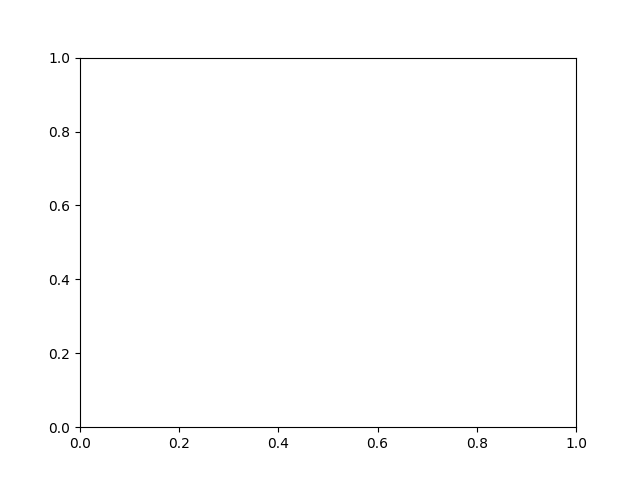

In [218]:
fig, axis = plt.subplots()

plot_rising(axis, meta_df_list[0], response_df_list[0])
plt.tight_layout()

#### Plot All Responses for 1 trial

0

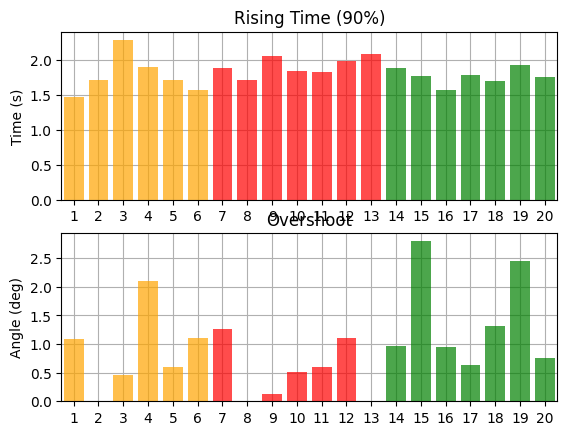

In [61]:
plot_response(['rise_t', 'overshoot'], meta_df_list[0], response_df_list[0])
plt.tight_layout()

#### Plot respones for all trials

/tmp/ipykernel_4494/2468389403.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(len(plot_list))


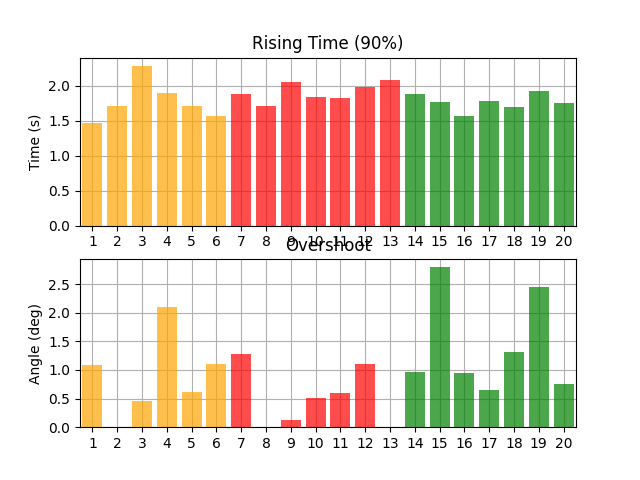

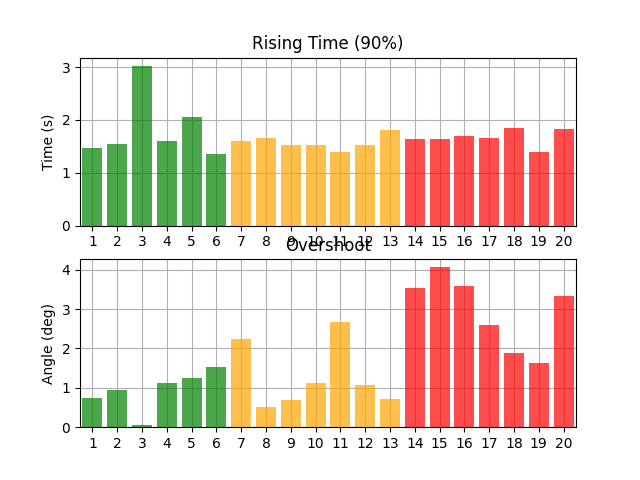

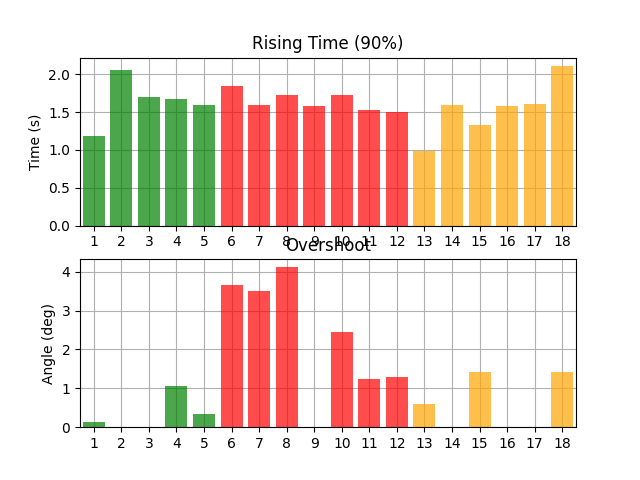

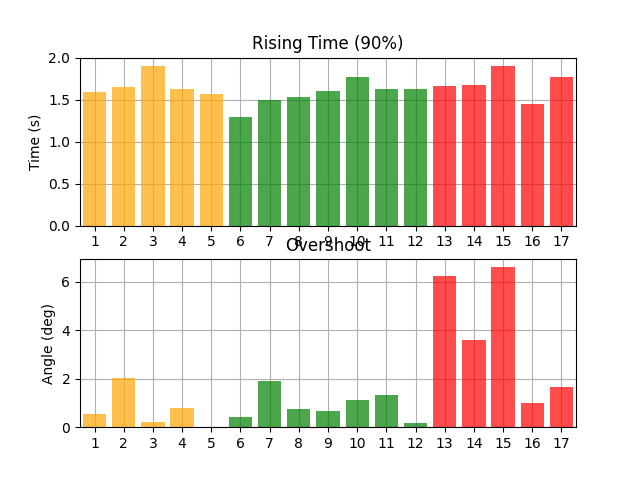

In [27]:
fig_list = []
axis_list = []
i = 0
for trial in state_df_list:
    fig, axes = plot_response(['rise_t', 'overshoot'], meta_df_list[i], response_df_list[i])
    fig_list.append(fig)
    axis_list.append(axes)
    i = i + 1
    plt.tight_layout()

## Analyse Data

#### Response for 1 trial

In [77]:
trial = 0 
response = 'rise_t'
meta_dataframe = meta_df_list[trial]
response_dataframe = response_df_list[trial]
mass_order = [meta_dataframe['mass_0'].iloc[0], meta_dataframe['mass_1'].iloc[0], meta_dataframe['mass_2'].iloc[0]]
mass_trial = [meta_dataframe['trials_0'].iloc[0], meta_dataframe['trials_1'].iloc[0], meta_dataframe['trials_2'].iloc[0]]

i = 0
trial_it = 0
response_avg = []
for trials in mass_trial:
    next = int(trial_it + trials)
    response_avg.append(response_dataframe[response].iloc[trial_it : next].mean())
    trial_it = next
    i = i + 1

j = 0
for trial in response_avg:
    print(response, " for ", mass_order[j], "kg is ", trial)
    j = j + 1
# TODO: standard deviation

rise_t  for  0.0 kg is  1.8416664420000002
rise_t  for  1.0 kg is  1.5792844495714284
rise_t  for  2.0 kg is  1.6714280932857146


In [78]:
trial = 0 
response = 'overshoot'
meta_dataframe = meta_df_list[trial]
response_dataframe = response_df_list[trial]
mass_order = [meta_dataframe['mass_0'].iloc[0], meta_dataframe['mass_1'].iloc[0], meta_dataframe['mass_2'].iloc[0]]
mass_trial = [meta_dataframe['trials_0'].iloc[0], meta_dataframe['trials_1'].iloc[0], meta_dataframe['trials_2'].iloc[0]]

i = 0
trial_it = 0
response_avg = []
for trials in mass_trial:
    next = int(trial_it + trials)
    response_avg.append(response_dataframe[response].iloc[trial_it : next].mean())
    trial_it = next
    i = i + 1

j = 0
for trial in response_avg:
    print(response, " for ", mass_order[j], "kg is ", trial)
    j = j + 1
# TODO: standard deviation

overshoot  for  0.0 kg is  0.9456400062828317
overshoot  for  1.0 kg is  1.2917717752318103
overshoot  for  2.0 kg is  2.9477574741254875


#### Average response over all experiments trials per mass

In [24]:
def calculate_response(response, state_df_list, response_df_list, meta_df_list):
    tmp_list = [[], [], []]
    i = 0
    for df in state_df_list:
        meta_dataframe = meta_df_list[i]
        response_dataframe = response_df_list[i]
        mass_order = [meta_dataframe['mass_0'].iloc[0], meta_dataframe['mass_1'].iloc[0], meta_dataframe['mass_2'].iloc[0]]
        mass_trial = [meta_dataframe['trials_0'].iloc[0], meta_dataframe['trials_1'].iloc[0], meta_dataframe['trials_2'].iloc[0]]

        j = 0
        trial_it = 0
        for trials in mass_trial:
            next = int(trial_it + trials)
            if mass_order[j] == 0.0:
                tmp_list[0].append(response_dataframe[response].iloc[trial_it:next])
            elif mass_order[j] == 1.0:
                tmp_list[1].append(response_dataframe[response].iloc[trial_it:next])
            elif mass_order[j] == 2.0:
                tmp_list[2].append(response_dataframe[response].iloc[trial_it:next])
            trial_it = next
            j = j + 1
        i = i + 1
    response_list = []
    for mass_response in tmp_list:
        response_list.append(pd.concat(mass_response, ignore_index=True))

    return response_list

In [25]:
rising_list = calculate_response('rise_t', state_df_list, response_df_list, meta_df_list)
overshoot_list = calculate_response('overshoot', state_df_list, response_df_list, meta_df_list)

print("Mass 0 rising time: ", rising_list[0].mean(), " +/- ", rising_list[0].std())
print("Mass 1 rising time: ", rising_list[1].mean(), " +/- ", rising_list[1].std())
print("Mass 2 rising time: ", rising_list[2].mean(), " +/- ", rising_list[2].std())
print("")
print("Mass 0 overshoot: ", overshoot_list[0].mean(), " +/- ", overshoot_list[0].std())
print("Mass 1 overshoot: ", overshoot_list[1].mean(), " +/- ", overshoot_list[1].std())
print("Mass 2 overshoot: ", overshoot_list[2].mean(), " +/- ", overshoot_list[2].std())

Mass 0 rising time:  1.7019998498400002  +/-  0.3466741457080627
Mass 1 rising time:  1.6347907903749999  +/-  0.2539959886609684
Mass 2 rising time:  1.731730506846154  +/-  0.17484817619652304

Mass 0 overshoot:  0.9375131675636158  +/-  0.7123006068144714
Mass 1 overshoot:  0.891212505238545  +/-  0.7694512337291112
Mass 2 overshoot:  2.291672456966237  +/-  1.830641878782983


### Calculate Response Information
Because I am stupid and forgot to record them for Nic31_03

**Note to self (cause I am being dumb): with pandas, the last index is not included in an indexing range**

In [129]:
state_df_list[2]

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,state.q_state.q,state.q_state.qd,state.q_state.qdd,state.tau,state.force_up,state.force_down,high
0,12.339875,2466,12,339874683,NaN,45.0,0.0,0.0,0.0,0.0,0.0,False
1,12.344931,2467,12,344930928,NaN,45.0,0.0,0.0,0.0,0.0,0.0,False
2,12.349939,2468,12,349938559,NaN,45.0,0.0,0.0,0.0,0.0,0.0,False
3,12.354930,2469,12,354930421,NaN,45.0,0.0,0.0,0.0,0.0,0.0,False
4,12.359934,2470,12,359934466,NaN,45.0,0.0,0.0,0.0,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
6004,42.359931,8470,42,359931069,NaN,45.0,0.0,0.0,0.0,0.0,0.0,True
6005,42.364934,8471,42,364933932,NaN,45.0,0.0,0.0,0.0,0.0,0.0,True
6006,42.369931,8472,42,369931414,NaN,45.0,0.0,0.0,0.0,0.0,0.0,True
6007,42.374932,8473,42,374931802,NaN,45.0,0.0,0.0,0.0,0.0,0.0,True


In [162]:
state_df_list[2]['Time'].iloc[0:200*5] - state_df_list[2]['Time'].iloc[0]

0      0.000000
1      0.005056
2      0.010064
3      0.015056
4      0.020060
         ...   
995    4.975056
996    4.980060
997    4.985057
998    4.990059
999    4.995055
Name: Time, Length: 1000, dtype: float64

In [148]:
state_df_list[2]['Time'].iloc[200*5:200*15] - state_df_list[2]['Time'].iloc[200*5]

1000    0.000000
1001    0.005000
1002    0.010002
1003    0.015000
1004    0.020000
          ...   
2995    9.975003
2996    9.980002
2997    9.985001
2998    9.990003
2999    9.995000
Name: Time, Length: 2000, dtype: float64

In [153]:
state_df_list[2]['high'].iloc[200*15]

False

In [158]:
state_df_list[2]['Time'][200*15:200*25] - state_df_list[2]['Time'].iloc[200*15]

3000    0.000000
3001    0.005000
3002    0.010000
3003    0.015002
3004    0.020000
          ...   
4995    9.975002
4996    9.980013
4997    9.985013
4998    9.990020
4999    9.995004
Name: Time, Length: 2000, dtype: float64

In [14]:
df = state_df_list[0]

# Manually find instance when high changes from false to high because yeah
state_array = df['high'].to_numpy()

i = 0
for status in state_array:
    if status == True and state_array[i-1] == False:
        break
    i = i + 1
# state_df_list[0]['high'].iloc[i]

trials = meta_df_list[0]['trials_0'].iloc[0] + meta_df_list[0]['trials_1'].iloc[0] + meta_df_list[0]['trials_2'].iloc[0]
rising_time_list = []
overshoot_list = []

rate = 200

start_index = i
for i in range(0, int(trials)):
    overshoot_list.append(df['state.q_state.q'].iloc[start_index:start_index + rate*10].max() - 80.0)
    rising_time_list.append(df.iloc[start_index:start_index + rate*10][df['state.q_state.q'] >= 80.0*0.95]['Time'].iloc[0] - df['Time'].iloc[start_index])
    start_index = start_index + rate*20 + 2

/tmp/ipykernel_31887/1871254886.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rising_time_list.append(df.iloc[start_index:start_index + rate*10][df['state.q_state.q'] >= 80.0*0.95]['Time'].iloc[0] - df['Time'].iloc[start_index])


IndexError: single positional indexer is out-of-bounds

In [220]:
mass_list = [meta_df_list[0]['mass_0'].iloc[0], meta_df_list[0]['mass_1'].iloc[0], meta_df_list[0]['mass_2'].iloc[0]]
trial_list = [meta_df_list[0]['trials_0'].iloc[0], meta_df_list[0]['trials_1'].iloc[0], meta_df_list[0]['trials_2'].iloc[0]]

overshoot_mean = []
overshoot_std = []
i = 0
index = 0
for trial in trial_list:
    os_array = np.array(overshoot_list[index:index+int(trial)])
    overshoot_mean.append(os_array.mean())
    overshoot_std.append(os_array.std())
    print("Mass", mass_list[i], 'overshoot:', os_array.mean(), '+/-', os_array.std())
    index = index + int(trial)
    i = i + 1
print("")

rise_t_mean = []
rise_t_std = []
i = 0
index = 0
for trial in trial_list:
    rt_array = np.array(rising_time_list[index:index+int(trial)])
    rise_t_mean.append(rt_array.mean())
    rise_t_std.append(rt_array.std())
    print("Mass", mass_list[i], 'rising time:', rt_array.mean(), '+/-', rt_array.std())
    index = index + int(trial)
    i = i + 1

Mass 0.0 overshoot: 15.124487150932959 +/- 1.6228332360135078
Mass 1.0 overshoot: 12.346639900721133 +/- 3.065147905981382
Mass 2.0 overshoot: 4.5607210572855905 +/- 4.907359691871654

Mass 0.0 rising time: 4.6325013101666555 +/- 1.1212137206360975
Mass 1.0 rising time: 3.154999895200035 +/- 0.10222520762313925
Mass 2.0 rising time: 3.8379999515999996 +/- 0.7371272364507944


In [221]:
os_mean_ordered = np.zeros(3)
os_std_ordered = np.zeros(3)
rt_mean_ordered = np.zeros(3)
rt_std_ordered = np.zeros(3)
for i in range(0, 3):
    if mass_list[i] == 0.0:
        os_mean_ordered[0] = overshoot_mean[i]
        os_std_ordered[0] = overshoot_std[i]
        rt_mean_ordered[0] = rise_t_mean[i]
        rt_std_ordered[0] = rise_t_std[i]
    elif mass_list[i] == 1.0:
        os_mean_ordered[1] = overshoot_mean[i]
        os_std_ordered[1] = overshoot_std[i]
        rt_mean_ordered[1] = rise_t_mean[i]
        rt_std_ordered[1] = rise_t_std[i]
    elif mass_list[i] == 2.0:
        os_mean_ordered[2] = overshoot_mean[i]
        os_std_ordered[2] = overshoot_std[i]
        rt_mean_ordered[2] = rise_t_mean[i]
        rt_std_ordered[2] = rise_t_std[i]
 
# fig, ax = plt.subplots()
# ax.bar()

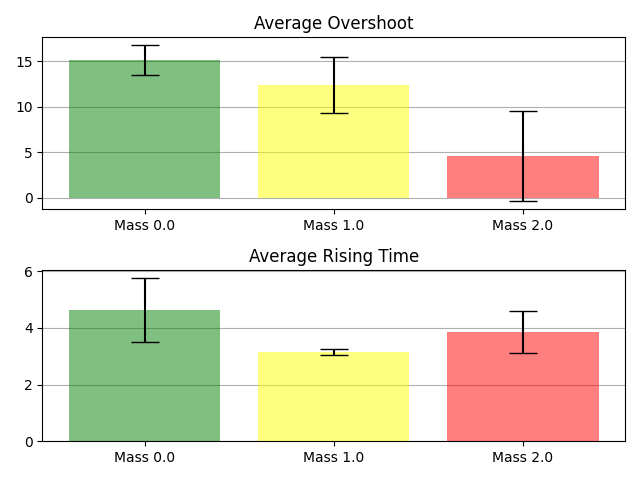

In [222]:
fig, ax = plt.subplots(2)
masses = ['Mass 0.0', 'Mass 1.0', 'Mass 2.0']
ax[0].bar(masses, os_mean_ordered, yerr = os_std_ordered, color=['green', 'yellow', 'red'], alpha = 0.5, capsize=10)
ax[0].yaxis.grid(True)
ax[0].set_axisbelow(True)
ax[0].set_title('Average Overshoot')

ax[1].bar(masses, rt_mean_ordered, yerr = rt_std_ordered, color=['green', 'yellow', 'red'], alpha = 0.5, capsize=10)
ax[1].yaxis.grid(True)
ax[1].set_axisbelow(True)
ax[1].set_title('Average Rising Time')

plt.tight_layout()